### **IMPORTS**

In [65]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import cleaning as cl
import transforming as tr

# **DATA UNDERSTANDING**

### **CV'S PATHS**

In [66]:
paths = {
    "pacientes": '../../data/raw_2/pacientes_data.csv',
    "caqueta": '../../data/raw/caqueta_data.csv',
    "narino": '../../data/raw/Narino_data.csv',
    "putumayo": '../../data/raw/Putumayo_data.csv',
    "caqueta_2": '../../data/raw_2/caqueta_data_2.csv',
    "narino_2": '../../data/raw_2/Narino_data_2.csv',
    "putumayo_2": '../../data/raw_2/Putumayo_data_2.csv',
}

### **READ AND NAME CV'S**

In [67]:
pacientes_df = pd.read_csv(paths["pacientes"], low_memory=False)
caqueta_df = pd.read_csv(paths["caqueta"], low_memory=False)
narino_df = pd.read_csv(paths["narino"], low_memory=False)
putumayo_df = pd.read_csv(paths["putumayo"], low_memory=False)
caqueta_df_2 = pd.read_csv(paths["caqueta_2"], low_memory=False)
narino_df_2 = pd.read_csv(paths["narino_2"], low_memory=False)
putumayo_df_2 = pd.read_csv(paths["putumayo_2"], low_memory=False)

caqueta_df.name = 'caqueta'
pacientes_df.name = 'pacientes'
narino_df.name = 'narino'
putumayo_df.name = 'putumayo'
caqueta_df_2.name = 'caqueta_2'
narino_df_2.name = 'narino_2'
putumayo_df_2.name = 'putumayo_2'

# **BEFORE CLEANING**

### **COLUMNS**

In [68]:
print("caqueta: ", list(caqueta_df_2))
print("narino: ", list(narino_df_2))
print("putumayo: ", list(putumayo_df_2))

caqueta:  ['Año', 'Mes', 'Grupo de Riesgo', 'Programa', 'Evento', 'Afiliados', 'OrigenBD', 'CodDepto', 'DesDepto', 'CodMpio', 'DescMpio', 'Latitud_Y_Mpio', 'Longitud_X_Mpio', 'tipo_usuario', 'Estado', 'FechaNovedadFallecido', 'tipo_identifiCAcion', 'Documento', 'ConCAtenar', 'nombre1', 'nombre2', 'apellido1', 'apellido2', 'FechaNac', 'Edad', 'CiclosV', 'DescrCiclosV', 'QuinQ', 'DescQuinQ', 'Género', 'Cod_Género', 'EnfoqueDif', 'Hecho Victimizante', 'RUV', 'Nivel_Educativo', 'Ocupación', 'Tipo de afiliado', 'Estado_Civil', 'Discapacidad', 'Tipo de Discapacidad', 'Condición de Discapacidad', 'Grado de Discapacidad', 'Pertenencia Étnica', 'MUNICIPIO DONDE VIVE', 'DIRECCIÓN DE DONDE VIVE', 'TELEFONOS DE CONTACTO', 'Zona', 'Cód_poblado', 'Nombre_poblado', 'Latitud_Afiliado', 'Longitud_Afiliado', 'Validación_Dirección_Afiliado', 'CodDepto_IPS', 'DesDepto_IPS', 'CodMpio_IPS', 'DescMpio_IPS', 'CodIPS', 'Nombre_IPS', 'Dirección_IPS', 'Barrio_IPS', 'Teléfono_IPS', 'Latitud_IPS', 'Longitud_IPS', 

In [69]:
def comparable_info(df1, df2):
    fig, axes = plt.subplots(2, 1, figsize=(16, 6))
    fig.suptitle("Missigness comparison")
    print("*************** {} ***************".format(df1.name))
    print(df1.info())
    print(df1.describe())

    msno.matrix(df1, ax=axes[0], sparkline=False)
    axes[0].set_title(("Missing Values Matrix for {}".format(df1.name)))

    print("*************** {} ***************".format(df2.name))
    print(df2.info())
    print(df2.describe())

    msno.matrix(df2, ax=axes[1], sparkline=False)
    axes[1].set_title(("Missing Values Matrix for {}".format(df2.name)))

    plt.show()


### **INFO CAQUETÁ**

*************** caqueta ***************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861 entries, 0 to 1860
Columns: 150 entries, Año to Complicación Renales
dtypes: float64(95), int64(12), object(43)
memory usage: 2.1+ MB
None
          Año      Mes    Afiliados  CodDepto       CodMpio  \
count  1861.0   1861.0  1861.000000    1861.0   1861.000000   
mean   2022.0  44830.0   931.000000      18.0  18229.533584   
std       0.0      0.0   537.368744       0.0    282.059842   
min    2022.0  44830.0     1.000000      18.0  18001.000000   
25%    2022.0  44830.0   466.000000      18.0  18001.000000   
50%    2022.0  44830.0   931.000000      18.0  18094.000000   
75%    2022.0  44830.0  1396.000000      18.0  18460.000000   
max    2022.0  44830.0  1861.000000      18.0  18860.000000   

       FechaNovedadFallecido     Documento         Edad      CiclosV  \
count                    0.0  1.861000e+03  1861.000000  1861.000000   
mean                     NaN  4.571422e+07    63.07576

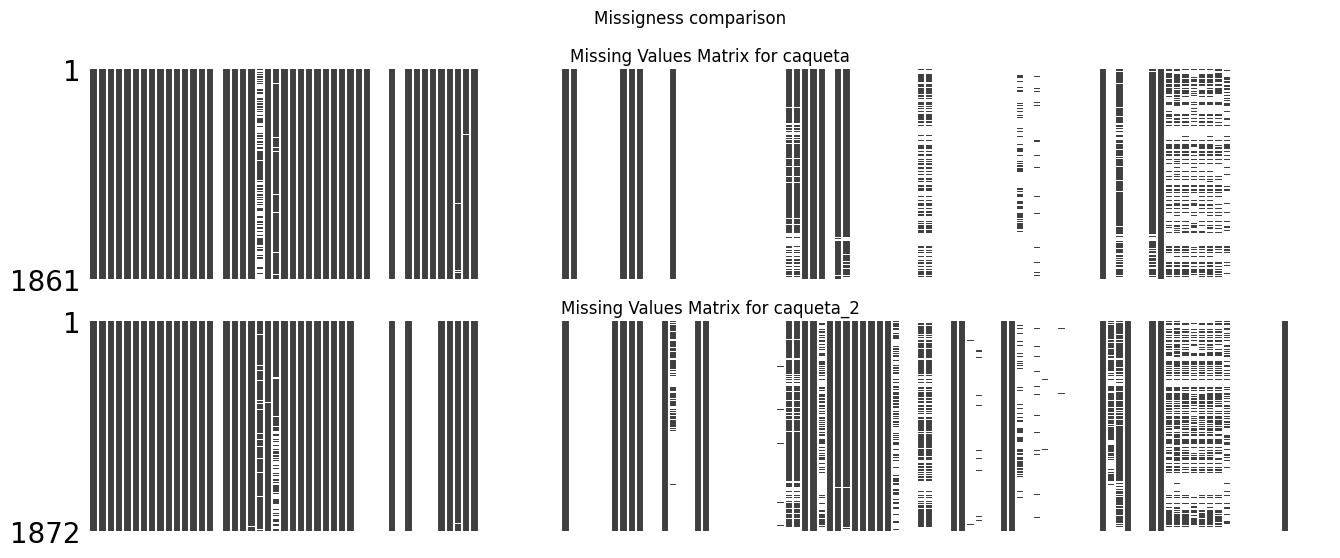

In [70]:
comparable_info(caqueta_df,caqueta_df_2)


### **INFO NARIÑO**

*************** narino ***************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4441 entries, 0 to 4440
Columns: 161 entries, Año to REPETIDO
dtypes: float64(44), int64(18), object(99)
memory usage: 5.5+ MB
None
          Año      Mes    Afiliados  CodDepto       CodMpio  tipo_usuario  \
count  4441.0   4441.0  4441.000000    4441.0   4441.000000           0.0   
mean   2022.0  44895.0  2221.000000      52.0  52413.624634           NaN   
std       0.0      0.0  1282.150602       0.0    347.143732           NaN   
min    2022.0  44895.0     1.000000      52.0  52001.000000           NaN   
25%    2022.0  44895.0  1111.000000      52.0  52001.000000           NaN   
50%    2022.0  44895.0  2221.000000      52.0  52356.000000           NaN   
75%    2022.0  44895.0  3331.000000      52.0  52835.000000           NaN   
max    2022.0  44895.0  4441.000000      52.0  52838.000000           NaN   

          Documento      FechaNac         Edad      CiclosV  ...  \
count  4.441000e+

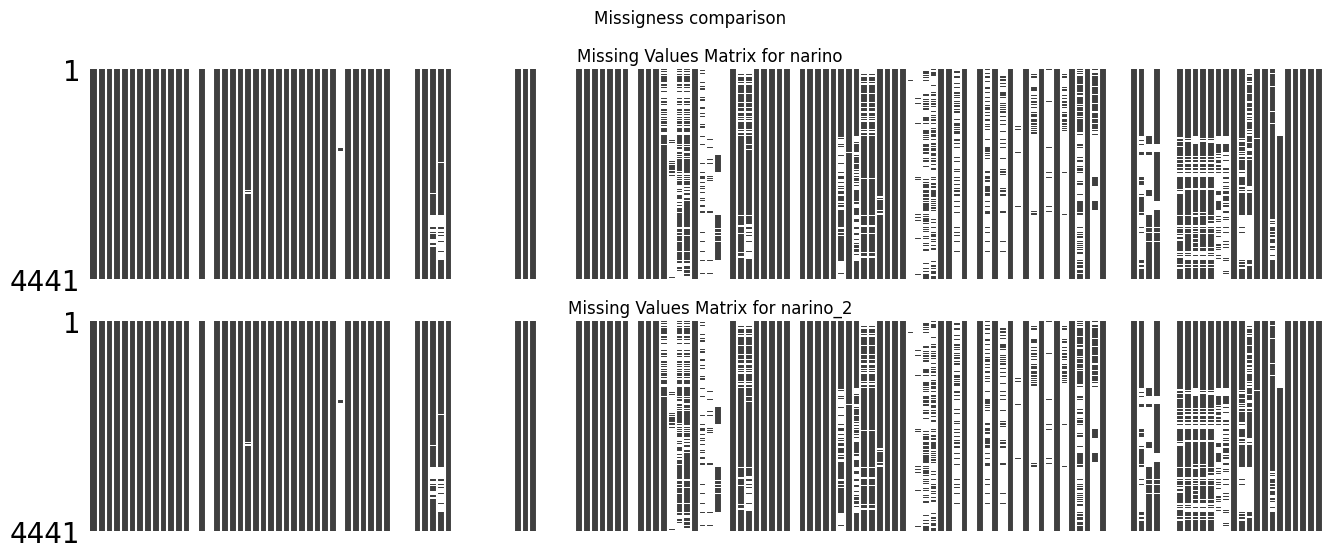

In [71]:
comparable_info(narino_df,narino_df_2)


### **INFO PUTUMAYO**

*************** putumayo ***************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Columns: 177 entries, Año to OBSERVACIONES
dtypes: float64(39), int64(16), object(122)
memory usage: 1.2+ MB
None
          Año      Mes   Afiliados  CodDepto       CodMpio  \
count   856.0    856.0  856.000000     856.0    856.000000   
mean   2022.0  44926.0  428.500000      86.0  86377.147196   
std       0.0      0.0  247.250211       0.0    345.618695   
min    2022.0  44926.0    1.000000      86.0  86001.000000   
25%    2022.0  44926.0  214.750000      86.0  86001.000000   
50%    2022.0  44926.0  428.500000      86.0  86568.000000   
75%    2022.0  44926.0  642.250000      86.0  86749.000000   
max    2022.0  44926.0  856.000000      86.0  86885.000000   

       FechaNovedadFallecido     Documento        Edad     CiclosV  \
count              42.000000  8.560000e+02  856.000000  855.000000   
mean            44465.238095  4.047116e+07   59.608645    5.487719   
std 

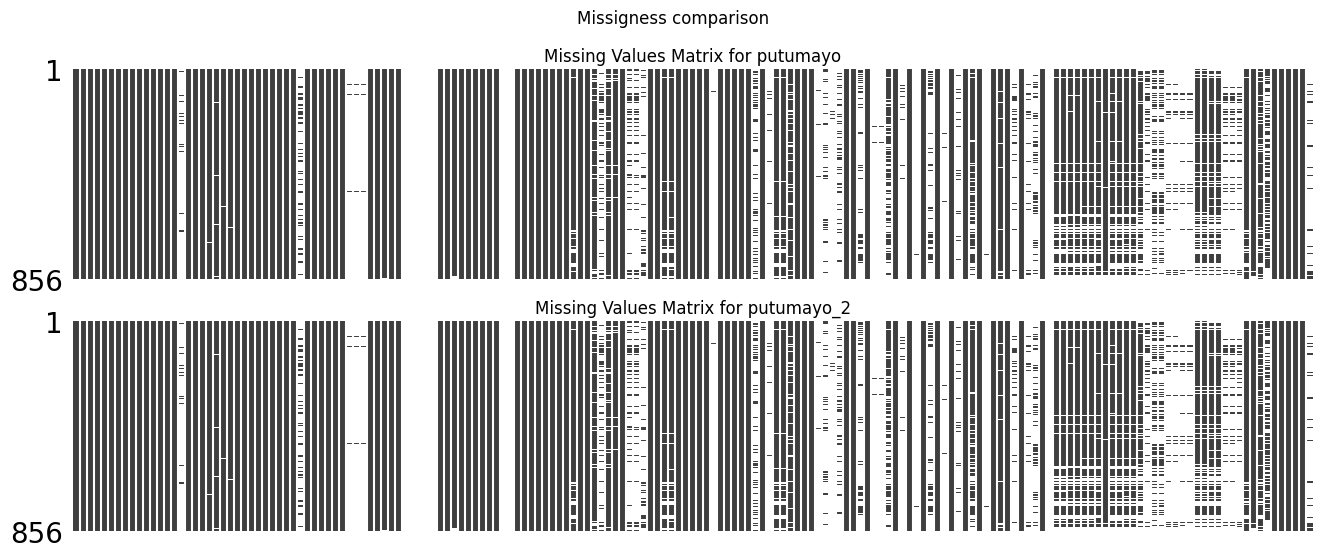

In [72]:
comparable_info(putumayo_df,putumayo_df_2)

### **INFO PACIENTS**

In [73]:
msno.matrix(pacientes_df, sparkline=False)
print("*************** {} ***************".format(pacientes_df.name))
print(pacientes_df.info())
print(pacientes_df.describe())

KeyboardInterrupt: 

# **Data Preparation**

### **DATA PREPARATION SETUP**

In [ ]:
saving_paths = {
    "transformed_data": '../../data/processed/transformed_data',
    "clean_data": '../../data/processed/cleaned_data/Cleaned_data.csv'
}

cl = cl.Cleaning(saving_paths["clean_data"])
tr = tr.Transform(saving_paths["clean_data"], saving_paths["transformed_data"])

In [ ]:
cl.run()
unified_df = cl.get_unified_df()
unified_df.name = 'unified df'
df_clean = cl.get_df_clean()
df_clean.name = 'clean df'

tr.run()
transformed_df = tr.get_df_transformed()
transformed_df.name = 'transformed df' 
X_train = tr.get_x_train_transformed()
X_train.name = 'X_train df' 
X_val = tr.get_x_val_transformed()
X_val.name = 'X_val df'
X_test = tr.get_x_test_transformed()
X_test.name = 'X_test df'
y_val = tr.get_y_val_transformed()
y_val.name = 'y_val df'
y_test = tr.get_y_test_transformed()
y_test.name = 'y_test df'

------------------------------------------------
Cleaning...
Data successfully cleaned!
Clean data successfully saved in: ../../data/processed/cleaned_data/Cleaned_data.csv
------------------------------------------------
------------------------------------------------
Transforming...
All transformations successfully applied!
Transformed data(Before split) succesfully saved in: ../../data/processed/transformed_data
X_train succesfully saved in: ../../data/processed/transformed_data
X_val succesfully saved in: ../../data/processed/transformed_data
X_test succesfully saved in: ../../data/processed/transformed_data
y_val succesfully saved in: ../../data/processed/transformed_data
y_test succesfully saved in: ../../data/processed/transformed_data
------------------------------------------------


### **UNIFIED DATA DRAME**

*************** unified df ***************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7169 entries, 0 to 1871
Data columns (total 60 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Grupo de Riesgo                                                     7169 non-null   object 
 1   CodDepto                                                            7169 non-null   int64  
 2   FechaNovedadFallecido                                               7169 non-null   object 
 3   Edad                                                                2727 non-null   object 
 4   Género                                                              7169 non-null   object 
 5   Cod_Género                                                          7169 non-null   int64  
 6   Tipo de Discapacidad                                                7

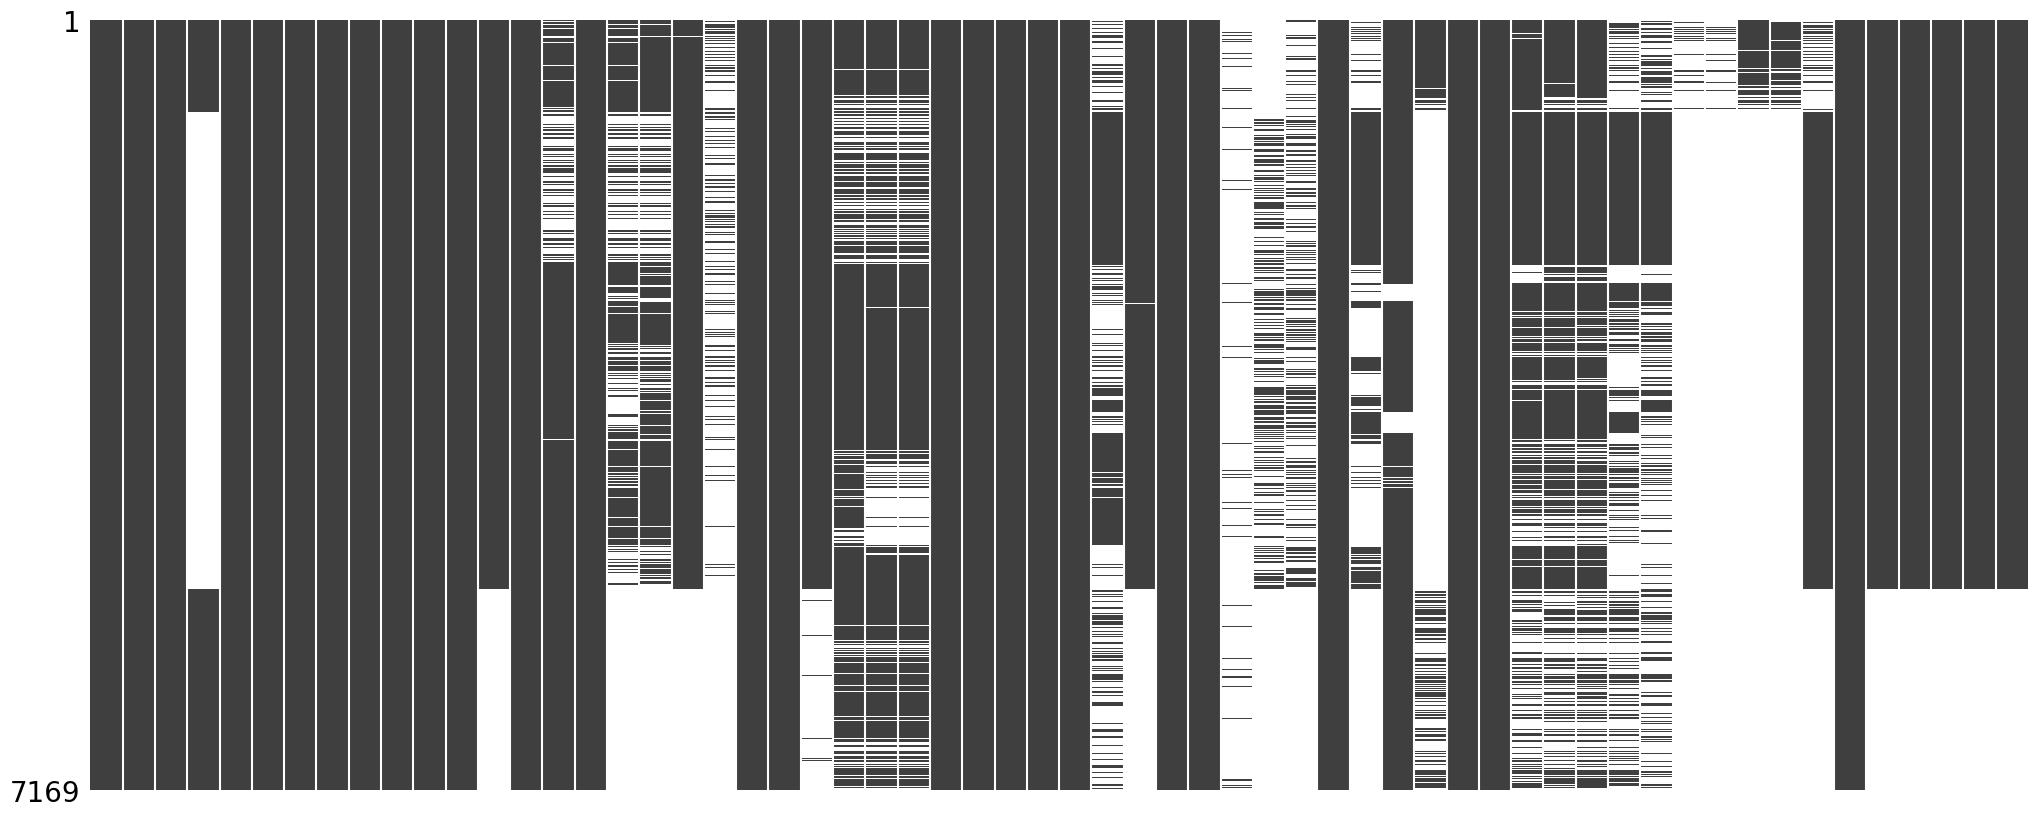

In [ ]:
msno.matrix(unified_df, sparkline=False)
print("*************** {} ***************".format(unified_df.name))
print(unified_df.info())
print(unified_df.describe())

### **Colums**

In [ ]:
def print_col_info(df,columns):
    for col in columns:
        print("\n********************************************************************************")
        print("Column: {}".format(col))
        print("Unique values in {} column:".format(col))
        print(df[col].unique())
        print("Value counts for {} column:".format(col))
        print(df[col].value_counts())
        print("Data type of {} column:".format(col))
        print(df[col].dtype)
        print("********************************************************************************")

#['Grupo de Riesgo', 'CodDepto', 'FechaNovedadFallecido', 'Edad', 'Género', 'Cod_Género', 'Tipo de Discapacidad', 'Condición de Discapacidad', 'Pertenencia Étnica', 'Coomorbilidad', 'ADHERENCIA AL TRATAMIENTO', 'Fumador Activo', 'CONSUMO DE ALCOHOL', 'ENTREGA DE MEDICAMENTO OPORTUNA ', 'FARMACOS ANTIHIPERTENSIVOS', 'OTROS FARMACOS ANTIHIPERTENSIVOS', 'RECIBE IECA', 'RECIBE ARA II', 'ESTATINA', 'ANTIDIABETICOS', 'OTROS ANTIDIABETICOS', 'OTROS TRATAMIENTOS', 'OTROS DIAGNÓSTICOS', 'PESO', 'TALLA', 'IMC', 'OBESIDAD', 'CALCULO DE RIESGO DE Framingham (% a 10 años)', 'Clasificación de RCV Global', 'DX CONFIRMADO DE HIPERTENSIÓN ARTERIAL', 'CÓD_DIABETES', 'CLASIFICACION DIABETES', 'DIAGNÓSTICO DISLIPIDEMIAS', 'ANTECEDENTE FAMILIAR  DE ENFERMEDAD CARDIOVASCULAR', 'CÓD_ANTEDECENTE', 'PRESION ARTERIAL', 'COLESTEROL ALTO', 'HDL ALTO', 'CLASIFICACIÓN DE RIESGO CARDIOVASCULAR', 'CALCULO TFG ', 'CLASIFICACIÓN ESTADIO ', 'CREATININA SÉRICA (HOMBRES > 1.7 MG/DL - MUJERES > 1.4 MG/DL) _DIC', 'GLICEMIA 100 MG/DL_DIC', 'COLESTEROL TOTAL > 200 MG/DL_DIC', 'LDL > 130 MG/DL_DIC', 'HDL HOMBRE - 40 MG/DL Y HDL MUJER - 50 MG/DL_DIC', 'TGD > 150 MG/DL_DIC', 'ALBUMINURIA/CREATINURIA', 'HEMOGLOBINA GLICOSILADA > DE 7%', 'HEMOGRAMA', 'POTASIO', 'MICROALBINURIA', 'CREATINURIA', 'UROANALIS', 'PERIMETRO ABDOMINAL', 'Complicación Cardiaca', 'Complicación Cerebral', 'Complicación Retinianas', 'Complicación Vascular', 'Complicación Renales']
print_col_info(unified_df,  list(unified_df))


********************************************************************************
Column: Grupo de Riesgo
Unique values in Grupo de Riesgo column:
['Población con riesgo o alteraciones cardio – cerebro – vascular – metabólicas manifiestas']
Value counts for Grupo de Riesgo column:
Población con riesgo o alteraciones cardio – cerebro – vascular – metabólicas manifiestas    7169
Name: Grupo de Riesgo, dtype: int64
Data type of Grupo de Riesgo column:
object
********************************************************************************

********************************************************************************
Column: CodDepto
Unique values in CodDepto column:
[86 52 18]
Value counts for CodDepto column:
52    4441
18    1872
86     856
Name: CodDepto, dtype: int64
Data type of CodDepto column:
int64
********************************************************************************

********************************************************************************
Column: FechaNovedad

In [77]:
data = unified_df
# Replace less frequent values with 'Other'
replace_dict = {'HCTZ+ARA o IECA+AMLODIPINO': 'Other',
                'HCTZ+ARA o IECA+Amlodipino+ Otro': 'Other',
                'HCTZ+AMLODIPINO': 'Other',
                'OTRO': 'Other',
                'HCTZ+AMLODIPINO+ARA': 'Other',
                'HCTZ+ARA': 'Other',
                'ARA + AMLODIPINO': 'Other',
                'ARA+AMLODIPINO': 'Other',
                'ARA+ASA': 'Other',
                'HTCA + ARA ': 'Other',
                'AMLODIPINO ': 'Other',
                'RETIRADO': 'Other',
                'IECA O ARA + HTZ +AMLODIPINO': 'Other',
                'HCTZ+ARA O IECA': 'Other',
                'HCTZ+CANDESARTAN ': 'Other',
                'Sin Dato': 'Other',
                'ARA O IECA ': 'Other',
                'Manejo no farmacologico': 'Other',
                'HCTZ+IECA O ARA+AMLODIPINO': 'Other',
                'ARA +HCTZ+AMLOPDIPINO': 'Other',
                'HCTZ+ ARA': 'Other',
                'LOSARTAN': 'Other',
                'ARA+HCTZ+AMLODIPINO': 'Other',
                'ENALAPRIL': 'Other',
                'HIDROCLOROTIAZIDA + ARA': 'Other',
                'IECA ó ARA': 'Other',
                'HCTZ + ARA ó IECA + AMLODIPINO': 'Other',
                'HCTZ + ARA ó IECA': 'Other',
                'HCTZ + ARA O IECA + AMLODIPINO + OTRO': 'Other',
                'Para manejo no farmacológico': 'Other'
                }
data['FARMACOS ANTIHIPERTENSIVOS'] = data['FARMACOS ANTIHIPERTENSIVOS'].replace(replace_dict)
print_col_info(unified_df,  ['FARMACOS ANTIHIPERTENSIVOS'])


********************************************************************************
Column: FARMACOS ANTIHIPERTENSIVOS
Unique values in FARMACOS ANTIHIPERTENSIVOS column:
['IECA O ARA' 'ARA' 'SIN DATO' 'Other' 'HCTZ+ARA+AMLODIPINO'
 'HCTZ+ARA o IECA' nan 'HCTZ' 'HCTZ+ARA ' 'IECA ' 'AMLODIPINO unicamente'
 'IECA' 'AMLODIPINO' 'Hidroclorotiazida (HCTZ)']
Value counts for FARMACOS ANTIHIPERTENSIVOS column:
Other                       3282
SIN DATO                    1944
Hidroclorotiazida (HCTZ)     363
IECA O ARA                   237
HCTZ+ARA o IECA              145
AMLODIPINO                    73
HCTZ                          59
ARA                           24
HCTZ+ARA+AMLODIPINO           15
IECA                          15
AMLODIPINO unicamente          7
HCTZ+ARA                       3
IECA                           1
Name: FARMACOS ANTIHIPERTENSIVOS, dtype: int64
Data type of FARMACOS ANTIHIPERTENSIVOS column:
object
****************************************************************

In [ ]:
import pandas as pd
import category_encoders as ce

# Load the data
data = unified_df 

# Define the feature hashing encoder
hash_encoder = ce.HashingEncoder(cols=['Coomorbilidad'], n_components=3)

# Apply the feature hashing encoder to the comorbidity column
comorbidity_hashed = hash_encoder.fit_transform(data)

# Drop the original comorbidity column
data.drop('Coomorbilidad', axis=1, inplace=True)

# Merge the hashed features with the original dataset
data = pd.concat([data, comorbidity_hashed], axis=1)

print_col_info(data,  ['col_0','col_1','col_2'])


********************************************************************************
Column: col_0
Unique values in col_0 column:
[0 1]
Value counts for col_0 column:
0    3829
1    3340
Name: col_0, dtype: int64
Data type of col_0 column:
int64
********************************************************************************

********************************************************************************
Column: col_1
Unique values in col_1 column:
[0 1]
Value counts for col_1 column:
0    7144
1      25
Name: col_1, dtype: int64
Data type of col_1 column:
int64
********************************************************************************

********************************************************************************
Column: col_2
Unique values in col_2 column:
[1 0]
Value counts for col_2 column:
1    3804
0    3365
Name: col_2, dtype: int64
Data type of col_2 column:
int64
********************************************************************************


### **CLEAN DATA DRAME**

*************** clean df ***************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7169 entries, 0 to 7168
Data columns (total 26 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Grupo de Riesgo                                     7169 non-null   object 
 1   CodDepto                                            7169 non-null   int64  
 2   FechaNovedadFallecido                               7169 non-null   object 
 3   Género                                              7169 non-null   object 
 4   Cod_Género                                          7169 non-null   int64  
 5   Tipo de Discapacidad                                7169 non-null   object 
 6   Condición de Discapacidad                           7169 non-null   object 
 7   Pertenencia Étnica                                  7169 non-null   object 
 8   Coomorbilidad                        

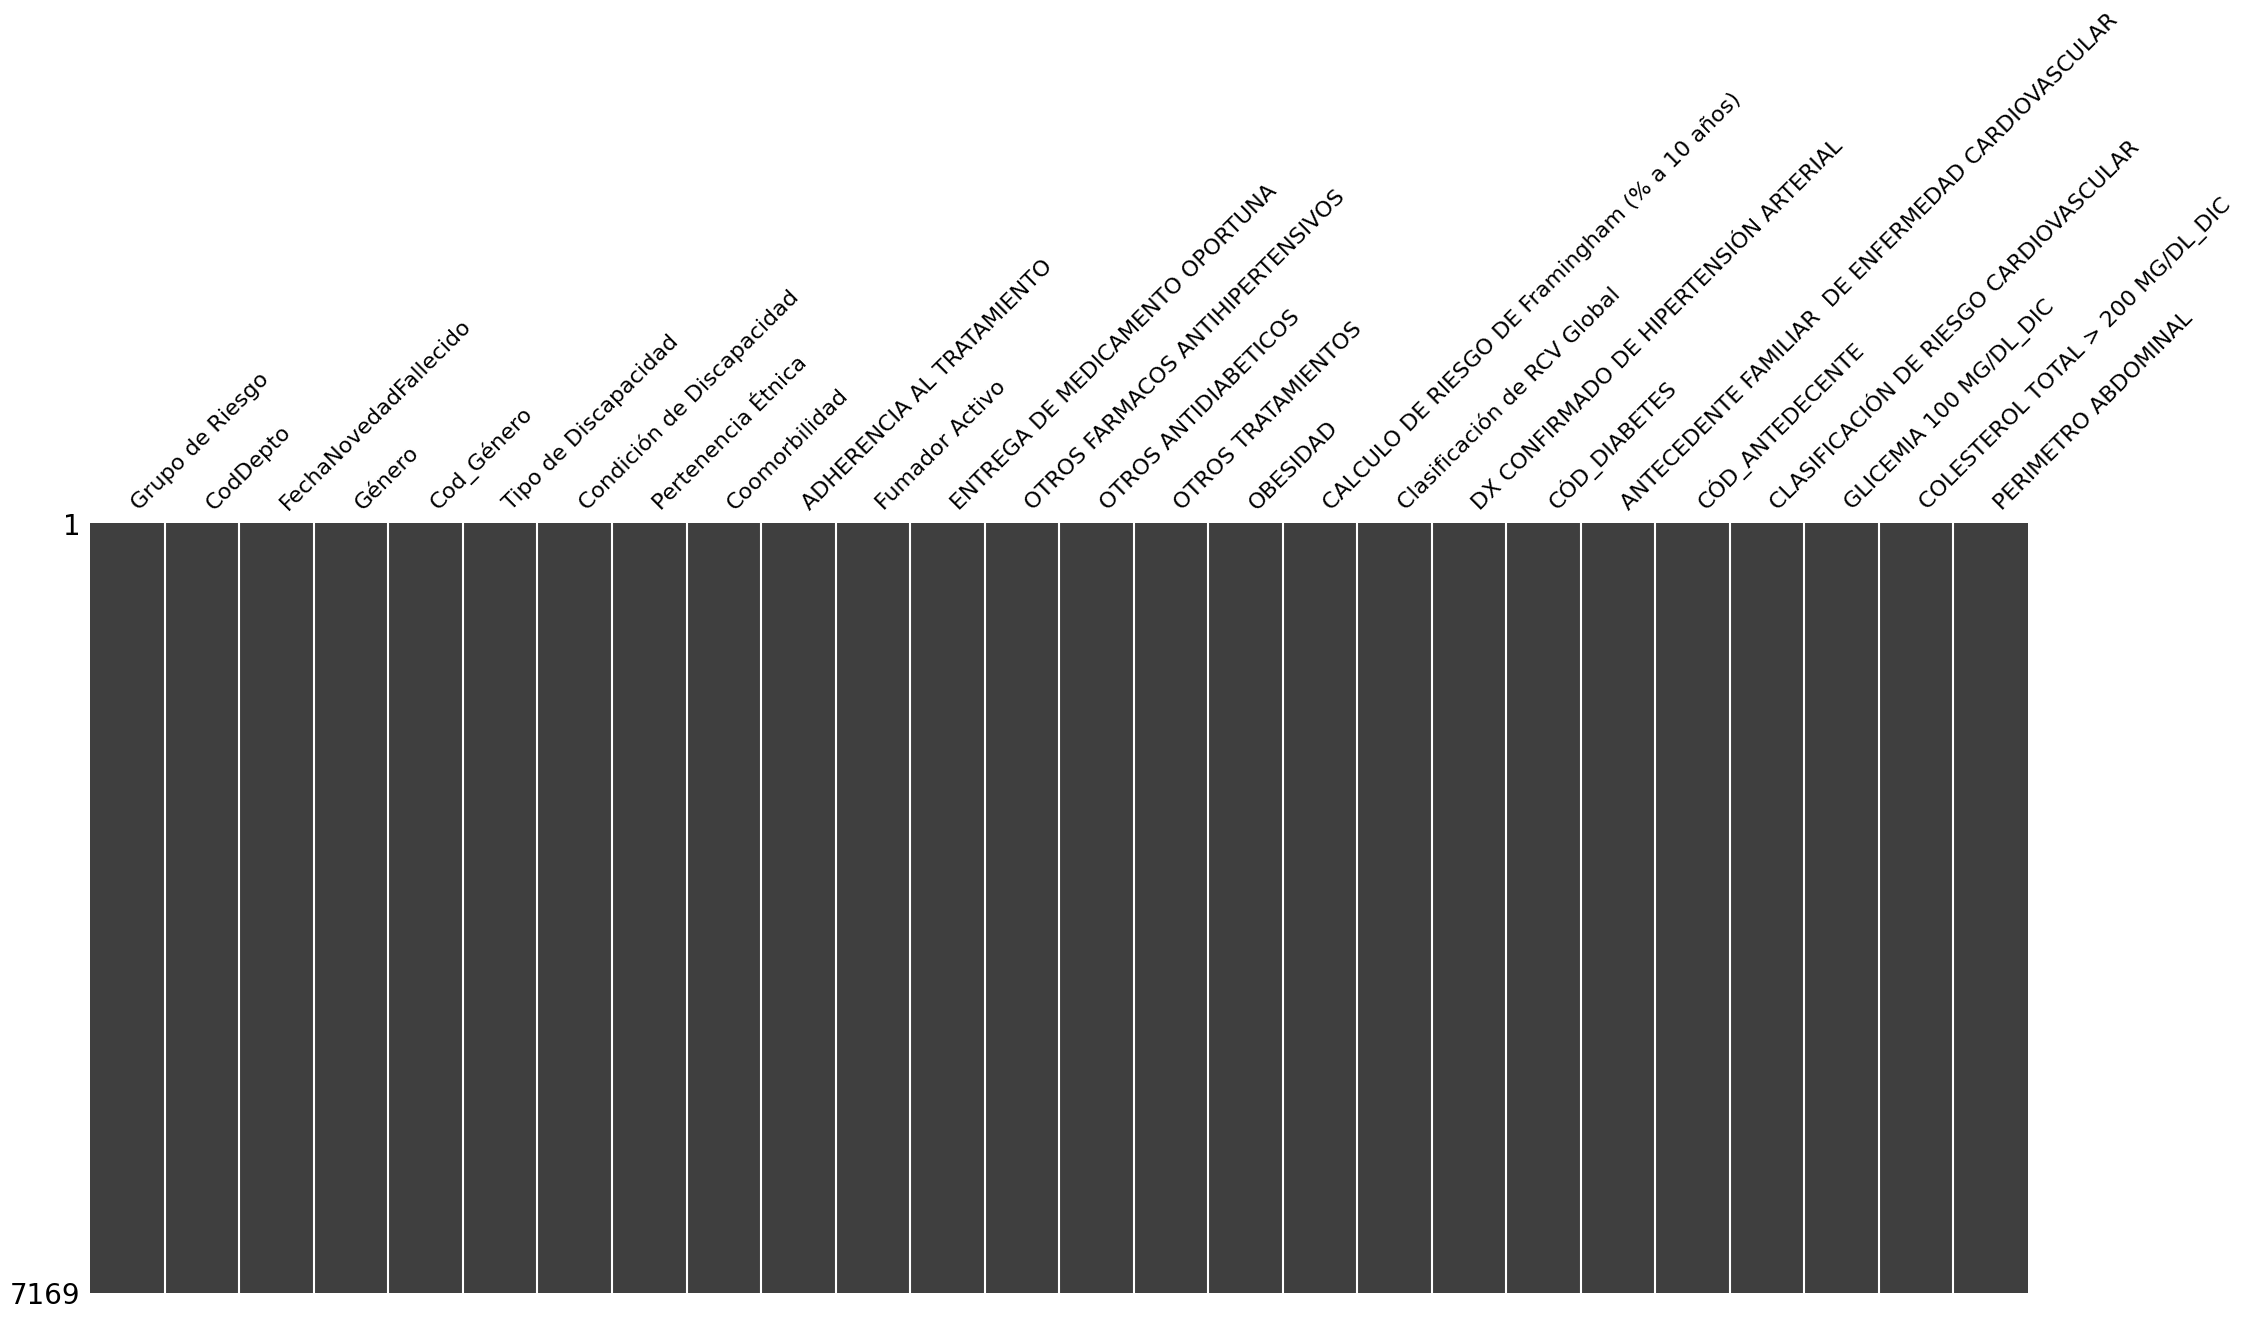

In [ ]:
msno.matrix(df_clean, sparkline=False)
print("*************** {} ***************".format(df_clean.name))
print(df_clean.info())
print(df_clean.describe())

## **TRANSFORMED DATA FRAME**

*************** transformed df ***************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7169 entries, 0 to 7168
Columns: 483 entries, Grupo de Riesgo to OBESIDAD_SOBREPESO
dtypes: float64(4), int64(5), object(8), uint8(466)
memory usage: 4.1+ MB
None
        Cod_Género  Fumador Activo  \
count  7169.000000     7169.000000   
mean      1.613754        0.008788   
std       0.486922        0.093337   
min       1.000000        0.000000   
25%       1.000000        0.000000   
50%       2.000000        0.000000   
75%       2.000000        0.000000   
max       2.000000        1.000000   

       CALCULO DE RIESGO DE Framingham (% a 10 años)  \
count                                    7169.000000   
mean                                       14.811186   
std                                        13.036423   
min                                         0.000000   
25%                                         2.000000   
50%                                        14.000000   
75%  

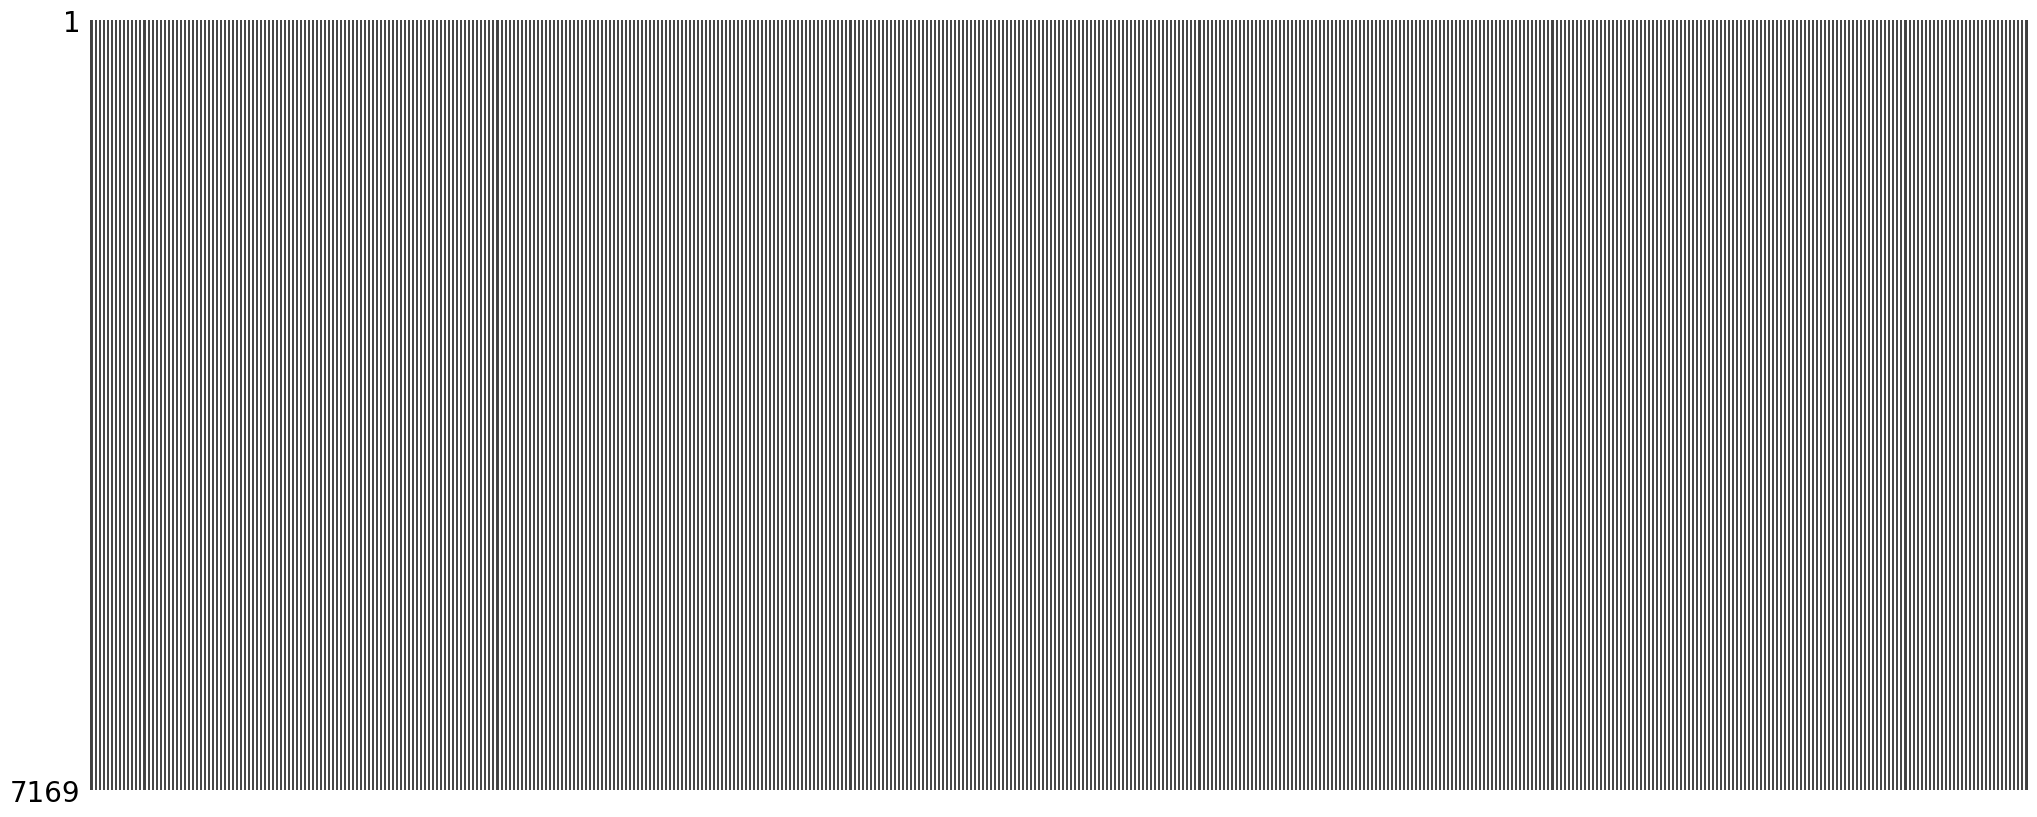

In [ ]:
msno.matrix(transformed_df, sparkline=False)
print("*************** {} ***************".format(transformed_df.name))
print(transformed_df.info())
print(transformed_df.describe())

In [ ]:
print("*************** {} ***************".format(X_train.name))
print(X_train.info())
print(X_train.describe())

*************** X_train df ***************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4301 entries, 6936 to 1654
Columns: 482 entries, Grupo de Riesgo to OBESIDAD_SOBREPESO
dtypes: float64(3), int64(5), object(8), uint8(466)
memory usage: 2.5+ MB
None
        Cod_Género  Fumador Activo  DX CONFIRMADO DE HIPERTENSIÓN ARTERIAL  \
count  4301.000000     4301.000000                             4301.000000   
mean      1.621716        0.008603                                1.302488   
std       0.485015        0.092361                                0.459389   
min       1.000000        0.000000                                1.000000   
25%       1.000000        0.000000                                1.000000   
50%       2.000000        0.000000                                1.000000   
75%       2.000000        0.000000                                2.000000   
max       2.000000        1.000000                                2.000000   

       CÓD_DIABETES  CÓD_ANTEDECENTE  

In [ ]:
print("*************** {} ***************".format(X_val.name))
print(X_val.info())
print(X_val.describe())

*************** X_val df ***************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1434 entries, 897 to 4428
Columns: 482 entries, Grupo de Riesgo to OBESIDAD_SOBREPESO
dtypes: float64(3), int64(5), object(8), uint8(466)
memory usage: 843.0+ KB
None
        Cod_Género  Fumador Activo  DX CONFIRMADO DE HIPERTENSIÓN ARTERIAL  \
count  1434.000000     1434.000000                             1434.000000   
mean      1.605997        0.006974                                1.297071   
std       0.488806        0.083245                                0.457128   
min       1.000000        0.000000                                1.000000   
25%       1.000000        0.000000                                1.000000   
50%       2.000000        0.000000                                1.000000   
75%       2.000000        0.000000                                2.000000   
max       2.000000        1.000000                                2.000000   

       CÓD_DIABETES  CÓD_ANTEDECENTE  G

In [ ]:
print("*************** {} ***************".format(X_test.name))
print(X_test.info())
print(X_test.describe())

*************** X_test df ***************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1434 entries, 6911 to 1706
Columns: 482 entries, Grupo de Riesgo to OBESIDAD_SOBREPESO
dtypes: float64(3), int64(5), object(8), uint8(466)
memory usage: 843.0+ KB
None
        Cod_Género  Fumador Activo  DX CONFIRMADO DE HIPERTENSIÓN ARTERIAL  \
count  1434.000000     1434.000000                             1434.000000   
mean      1.597629        0.011158                                1.313808   
std       0.490547        0.105075                                0.464201   
min       1.000000        0.000000                                1.000000   
25%       1.000000        0.000000                                1.000000   
50%       2.000000        0.000000                                1.000000   
75%       2.000000        0.000000                                2.000000   
max       2.000000        1.000000                                2.000000   

       CÓD_DIABETES  CÓD_ANTEDECENTE 

In [ ]:
print("*************** {} ***************".format(y_val.name))
print(y_val.info())
print(y_val.describe())

*************** y_val df ***************
<class 'pandas.core.series.Series'>
Int64Index: 1434 entries, 897 to 4428
Series name: y_val df
Non-Null Count  Dtype  
--------------  -----  
1434 non-null   float64
dtypes: float64(1)
memory usage: 22.4 KB
None
count    1434.000000
mean       14.808819
std        12.955745
min         0.000000
25%         2.000000
50%        14.000000
75%        22.000000
max        93.000000
Name: y_val df, dtype: float64


In [ ]:
print("*************** {} ***************".format(y_test.name))
print(y_test.info())
print(y_test.describe())

*************** y_test df ***************
<class 'pandas.core.series.Series'>
Int64Index: 1434 entries, 6911 to 1706
Series name: y_test df
Non-Null Count  Dtype  
--------------  -----  
1434 non-null   float64
dtypes: float64(1)
memory usage: 22.4 KB
None
count    1434.000000
mean       14.439947
std        13.089715
min         0.000000
25%         2.000000
50%        13.000000
75%        21.000000
max        93.000000
Name: y_test df, dtype: float64
